Цель - спрогнозировать сердечную недостаточность.

Порядок действий:

- Шаг 1. Получить данные из файла **Heart_Disease_Prediction_ru.csv**. Датасет разбить на тестовую и обучающую выборку. 
  Признак Сердечное заболевание. Presence - есть, Absence - нет. 
- Шаг 2. Выполнить кластерный анализ с помощью алгоритма k-means.
- Шаг 3. Построить диаграмму рассеивания - scatter plot.
- Шаг 5. Построить модель прогноза с помощью алгоритма Дерево решений.  Провести обучение модели.
- Шаг 6. Выполнить прогноз и провести оценку модели.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

**данные из файла Heart_Disease_Prediction_ru.csv** 

In [2]:
# Ваш код здесь
df = pd.read_csv('Heart_Disease_Prediction_ru.csv')
df.head()

,Возраст,Пол,Тип боли в груди,BP,Холестерин,FBS свыше 120,Результаты EKG,Max HR,Стенокардия,ST депрессия,Наклон ST,Количество сосудов флюро,Таллий,Сердечное заболевание
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Возраст                   270 non-null    int64  
 1   Пол                       270 non-null    int64  
 2   Тип боли в груди          270 non-null    int64  
 3   BP                        270 non-null    int64  
 4   Холестерин                270 non-null    int64  
 5   FBS свыше 120             270 non-null    int64  
 6   Результаты EKG            270 non-null    int64  
 7   Max HR                    270 non-null    int64  
 8   Стенокардия               270 non-null    int64  
 9   ST депрессия              270 non-null    float64
 10  Наклон ST                 270 non-null    int64  
 11  Количество сосудов флюро  270 non-null    int64  
 12  Таллий                    270 non-null    int64  
 13  Сердечное заболевание     270 non-null    object 
dtypes: float64

In [4]:
df.isnull().sum()

Возраст                     0
Пол                         0
Тип боли в груди            0
BP                          0
Холестерин                  0
FBS свыше 120               0
Результаты EKG              0
Max HR                      0
Стенокардия                 0
ST депрессия                0
Наклон ST                   0
Количество сосудов флюро    0
Таллий                      0
Сердечное заболевание       0
dtype: int64

In [5]:
for i in range(0, 7):
    print(' признак : ', df.columns[i])
    print(df[df.columns[i]].unique())   

 признак :  Возраст
[70 67 57 64 74 65 56 59 60 63 53 44 61 71 46 40 48 43 47 54 51 58 66 37
 50 42 62 49 52 45 41 76 39 35 55 34 38 69 68 77 29]
 признак :  Пол
[1 0]
 признак :  Тип боли в груди
[4 3 2 1]
 признак :  BP
[130 115 124 128 120 110 140 150 135 142 134 112 132 138 160 170 144 122
 152 101 126 118 136 105 174 145 108 156 106 104  94 146 148 178 125 100
 165 180 158 200 117 192 123 129 102 155 172]
 признак :  Холестерин
[322 564 261 263 269 177 256 239 293 407 234 226 235 303 149 311 203 211
 199 229 245 204 288 275 243 295 230 265 228 215 326 200 207 273 180 222
 223 209 233 197 218 246 225 315 205 417 195 198 166 178 249 281 126 305
 240 276 319 242 260 354 309 208 236 270 214 201 244 306 221 330 266 206
 212 302 313 141 237 289 254 274 258 160 327 304 271 283 188 286 360 267
 196 232 277 210 213 282 167 224 268 250 219 217 308 193 231 262 259 325
 299 182 294 298 409 172 184 394 174 255 248 300 318 216 252 227 220 168
 183 341 186 307 164 257 321 264 253 185 290 175 353

for i in range(7,14):
    print(' признак : ', df.columns[i])
    print(df[df.columns[i]].unique())

In [6]:
X = df.replace({'Сердечное заболевание' : {'Absence':0, 'Presence':1}})
# X = df[['Возраст','Пол','Тип боли в груди','BP','Холестерин','FBS свыше 120','Результаты EKG','Max HR','Стенокардия','ST депрессия','Наклон ST','Количество сосудов флюро','Таллий']]
X

,Возраст,Пол,Тип боли в груди,BP,Холестерин,FBS свыше 120,Результаты EKG,Max HR,Стенокардия,ST депрессия,Наклон ST,Количество сосудов флюро,Таллий,Сердечное заболевание
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


0    150
1    120
Name: Сердечное заболевание, dtype: int64


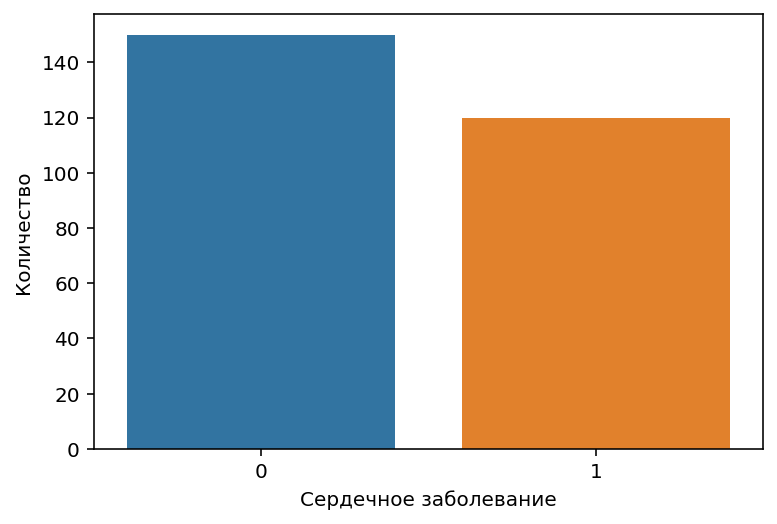

In [7]:
print(X['Сердечное заболевание'].value_counts())
sns.countplot(X['Сердечное заболевание'])
plt.xlabel("Сердечное заболевание")
plt.ylabel("Количество")
plt.show()

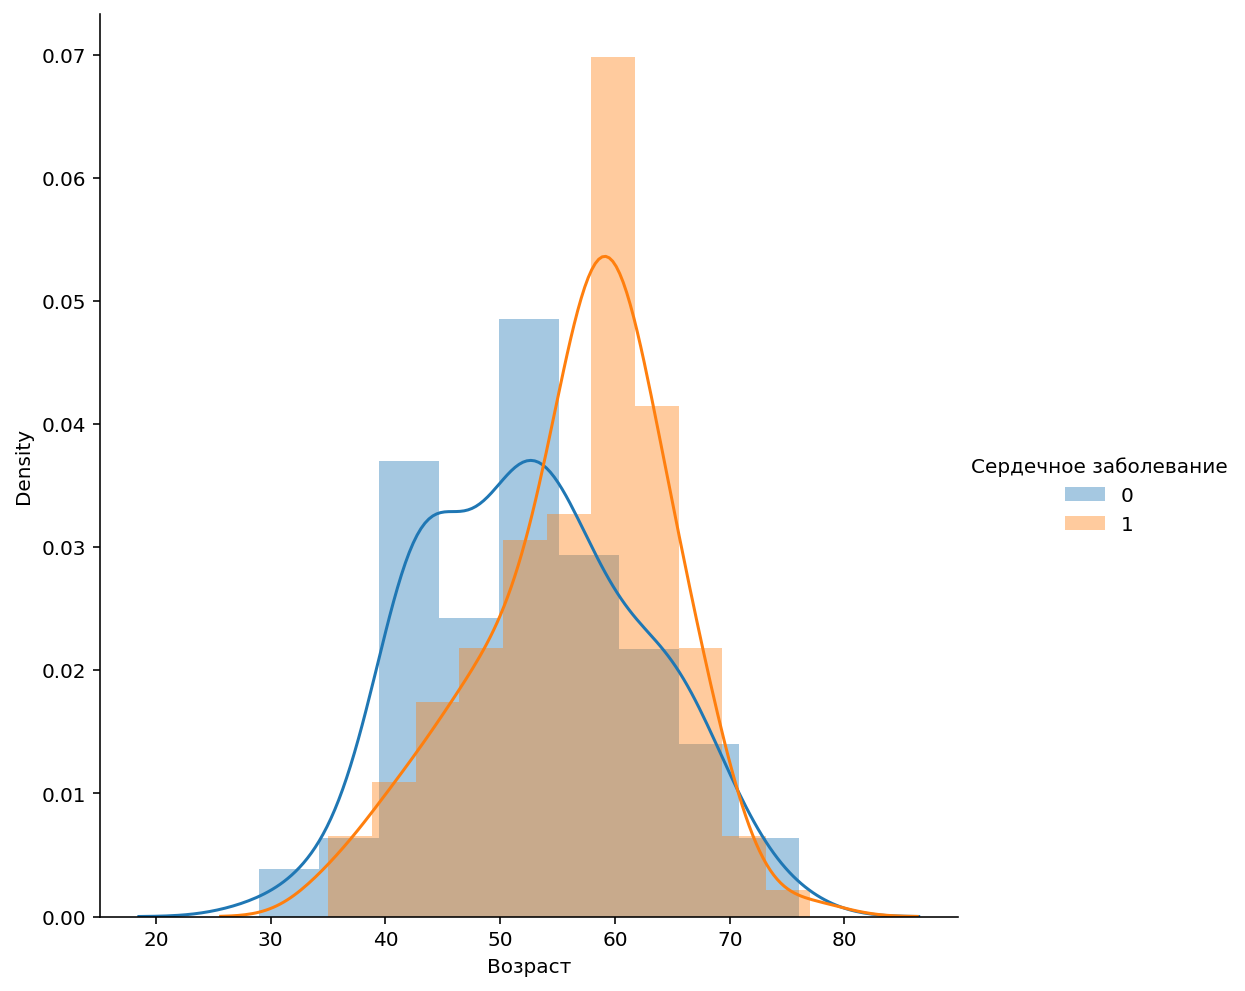

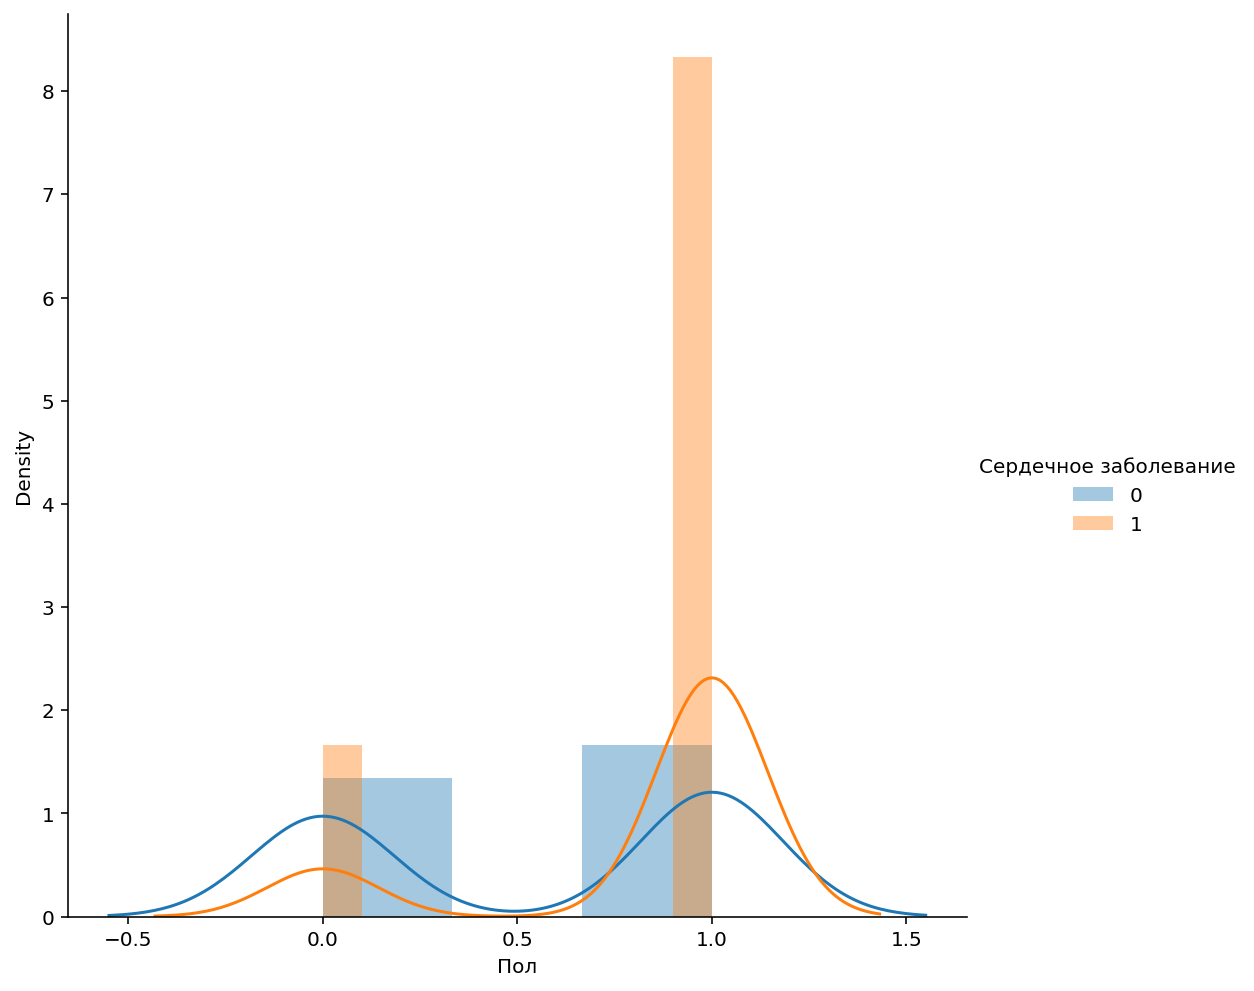

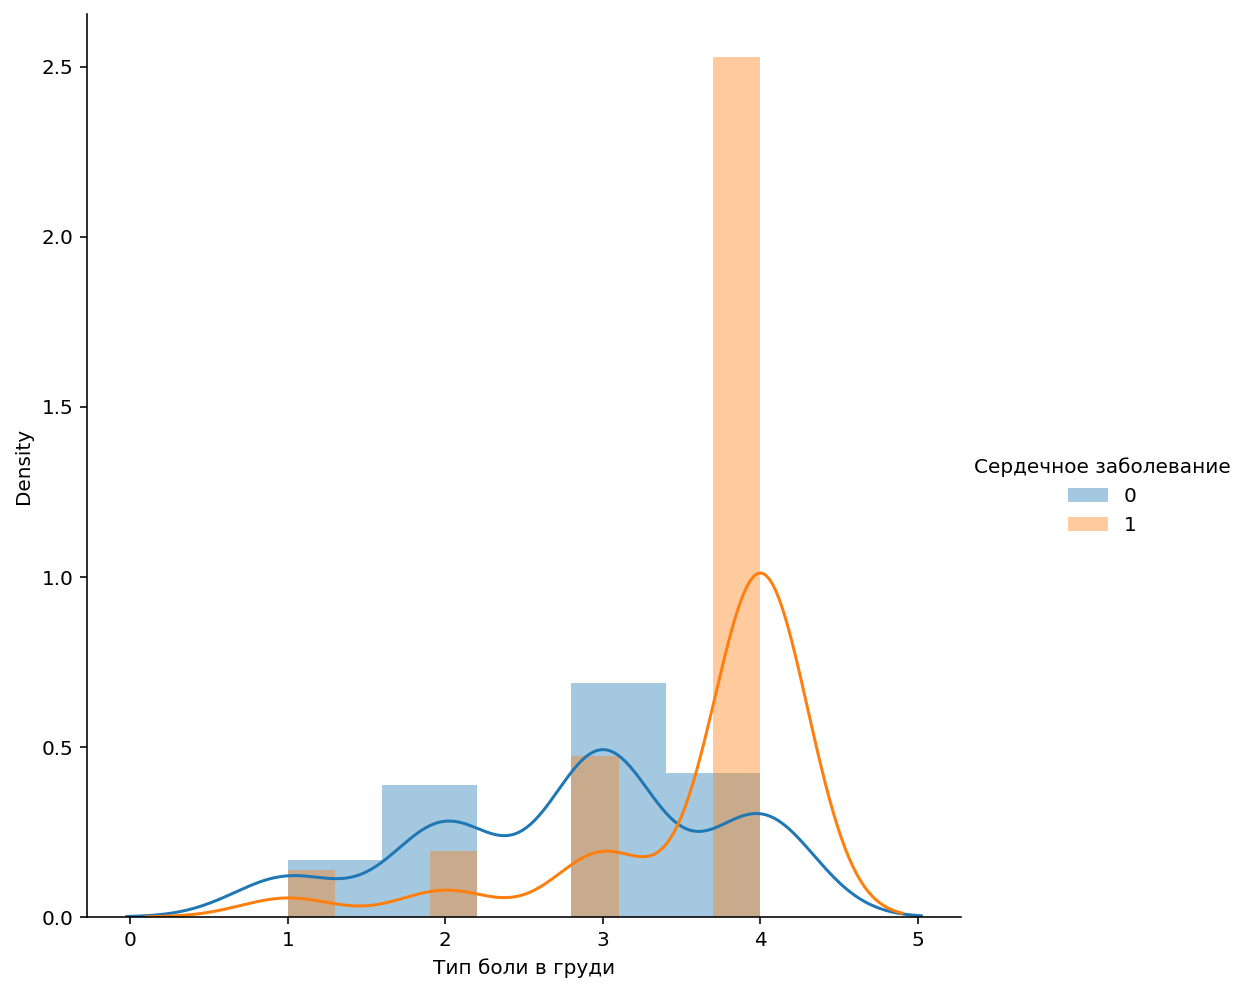

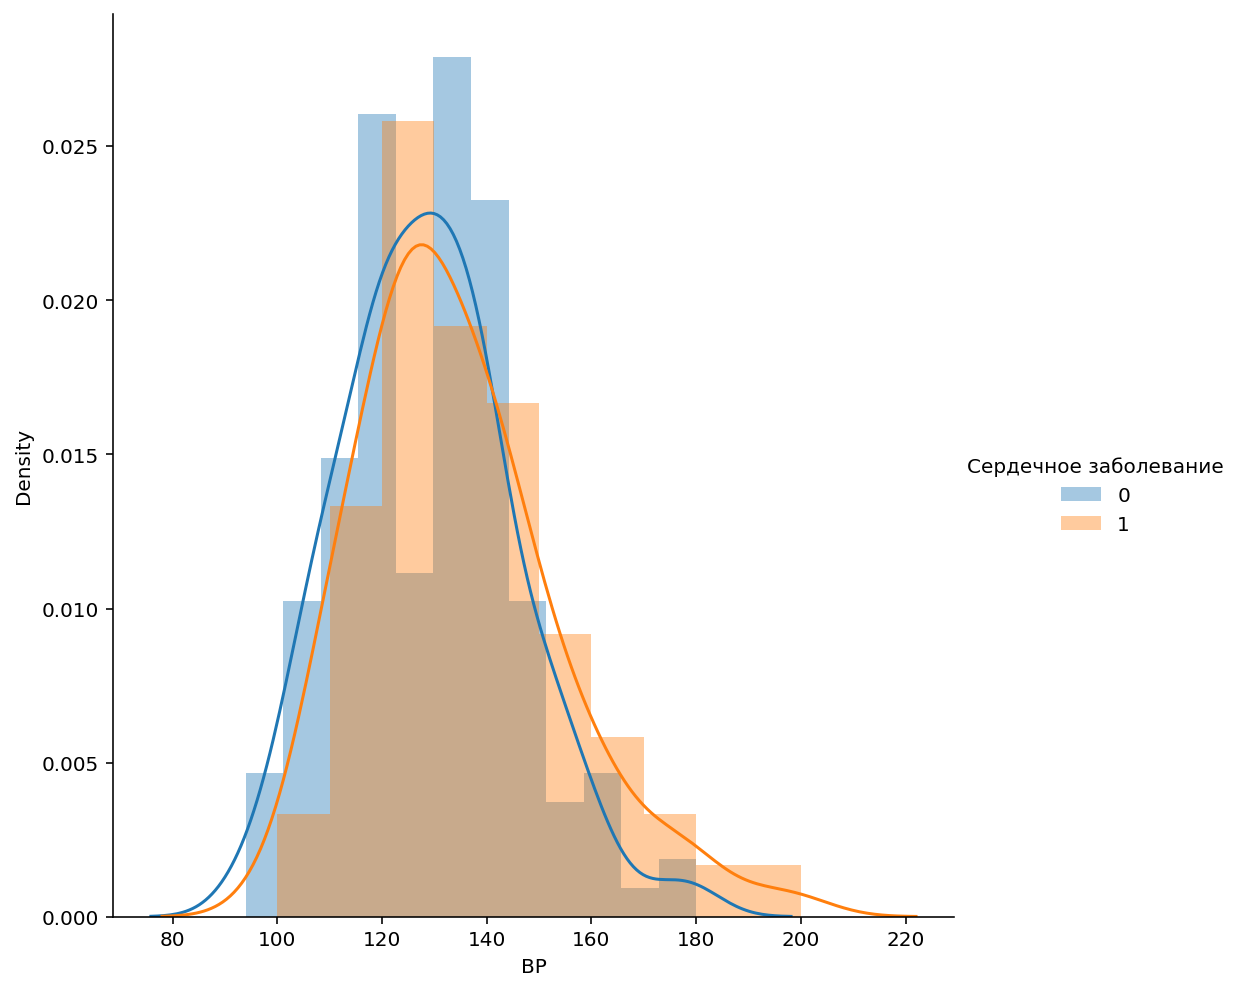

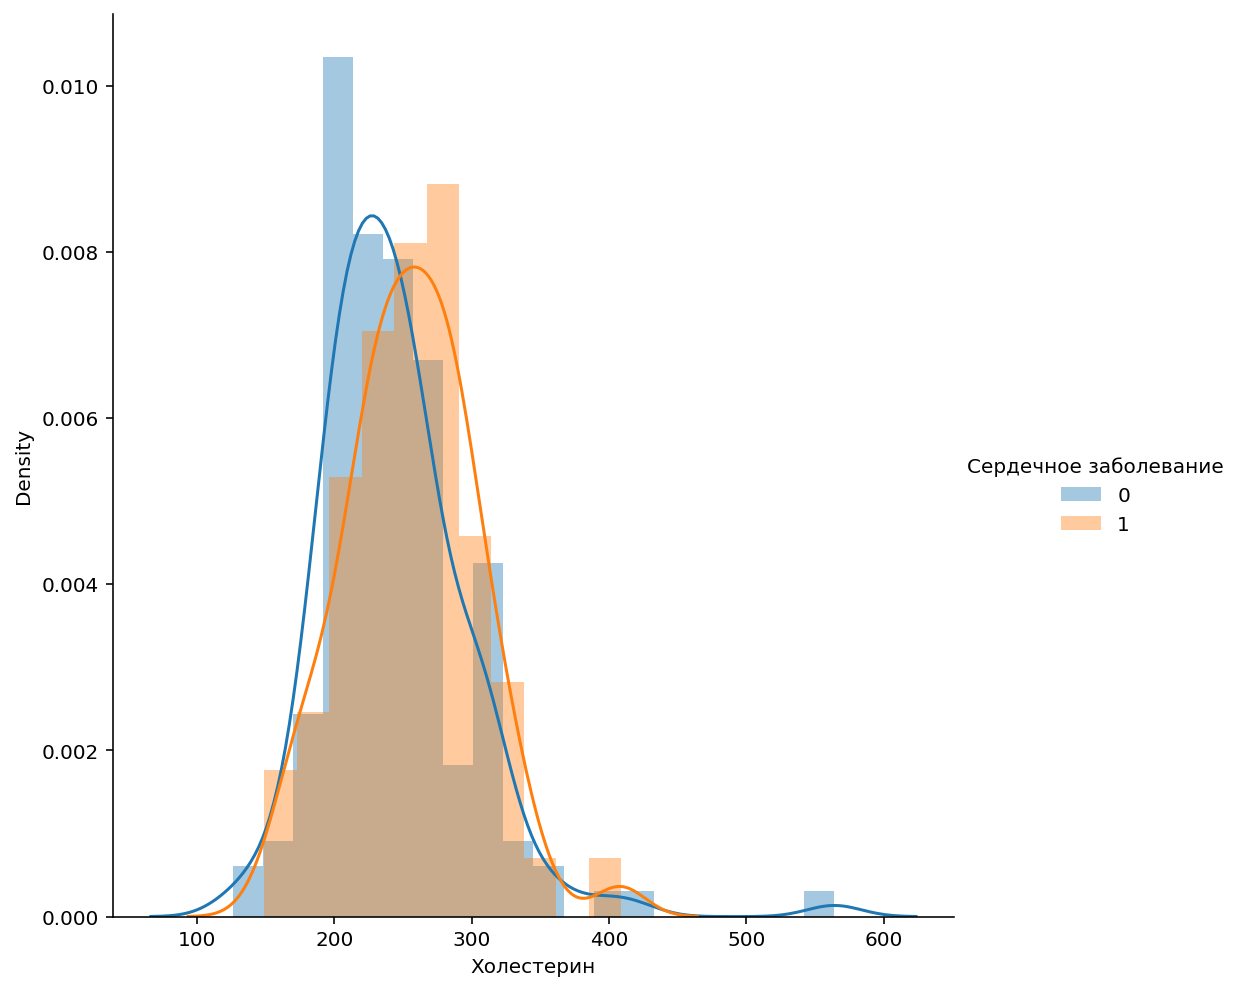

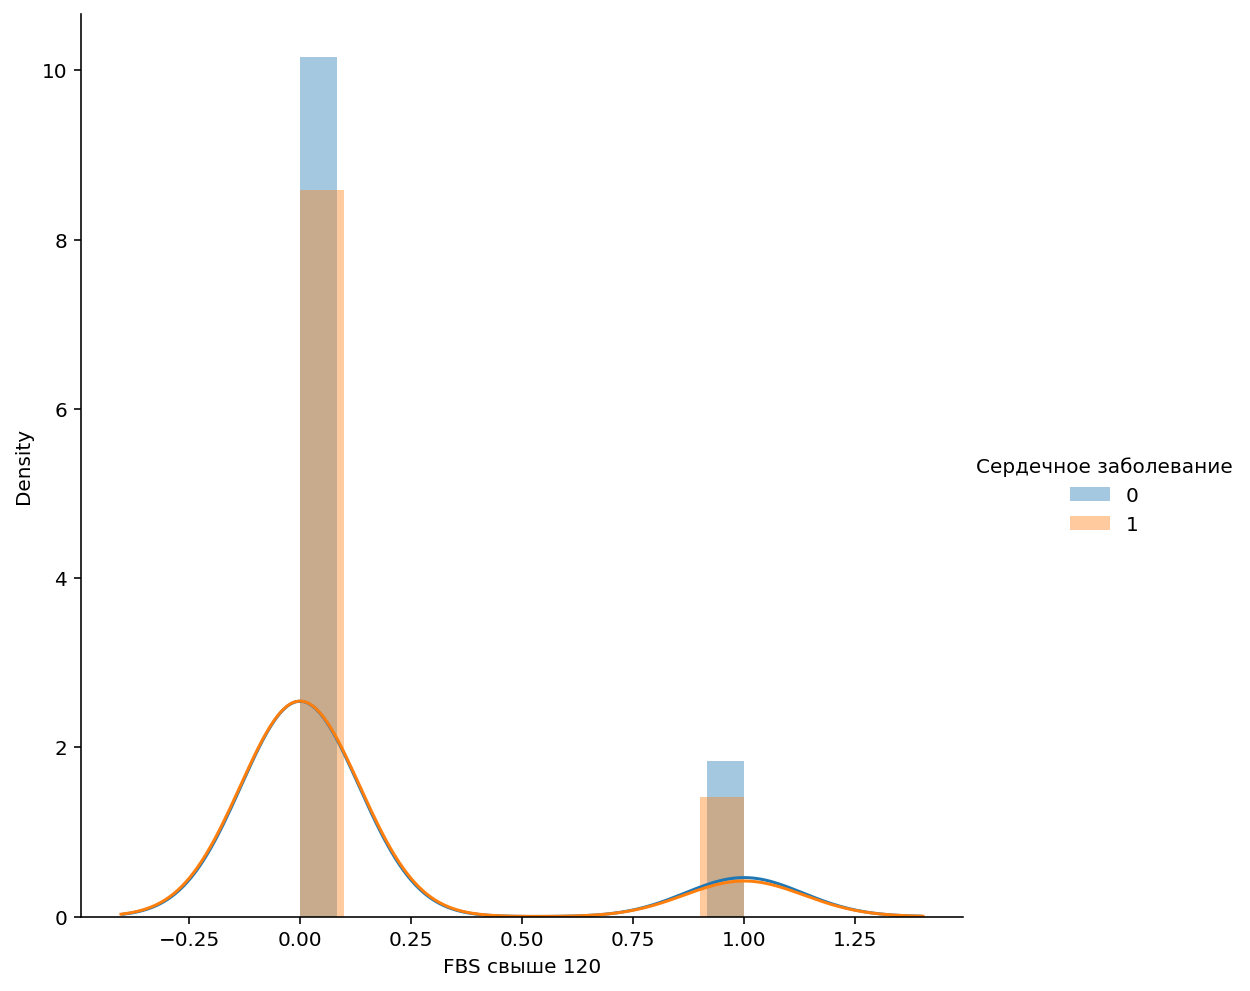

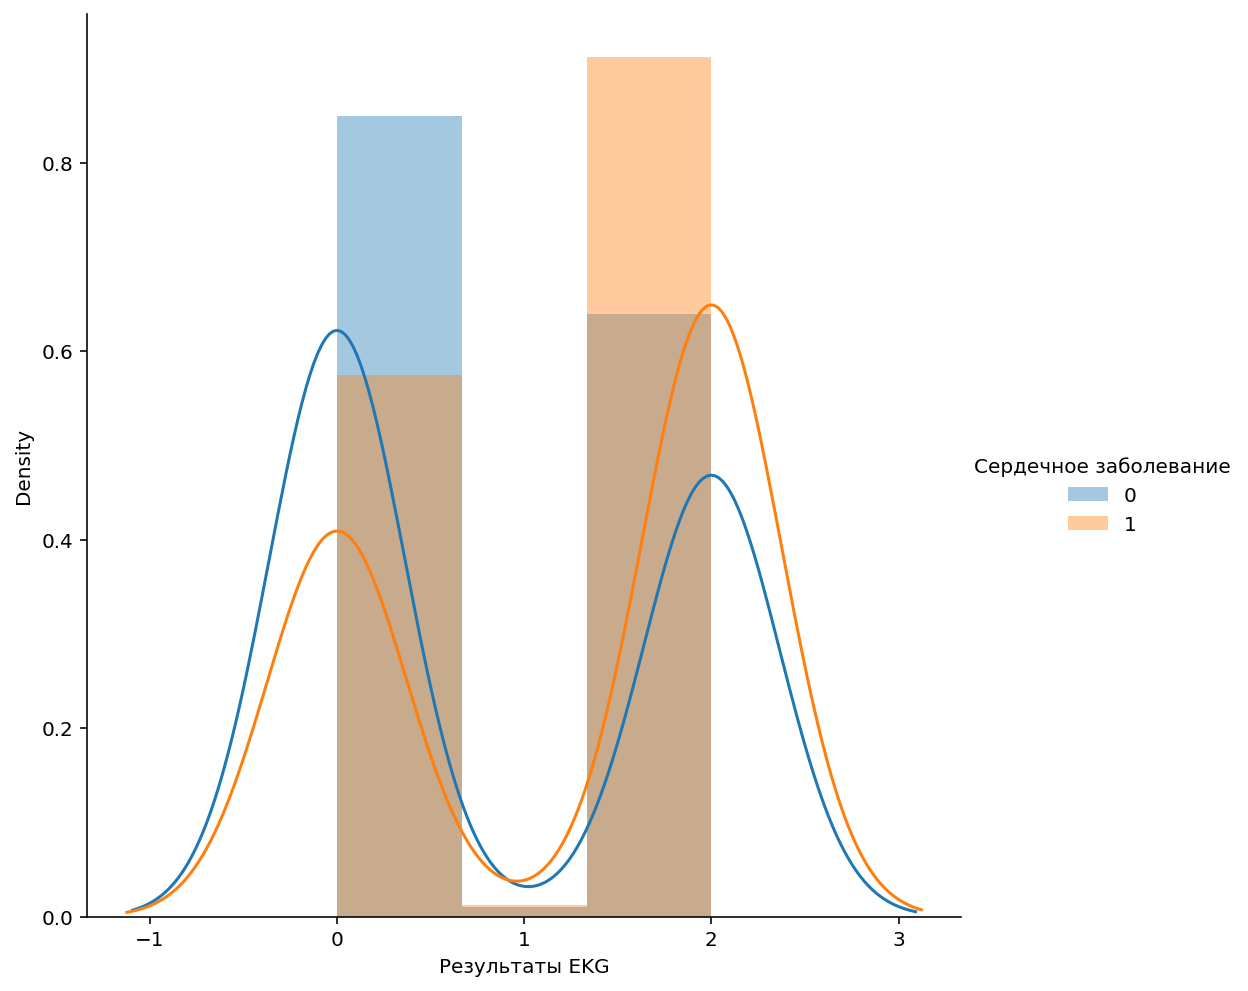

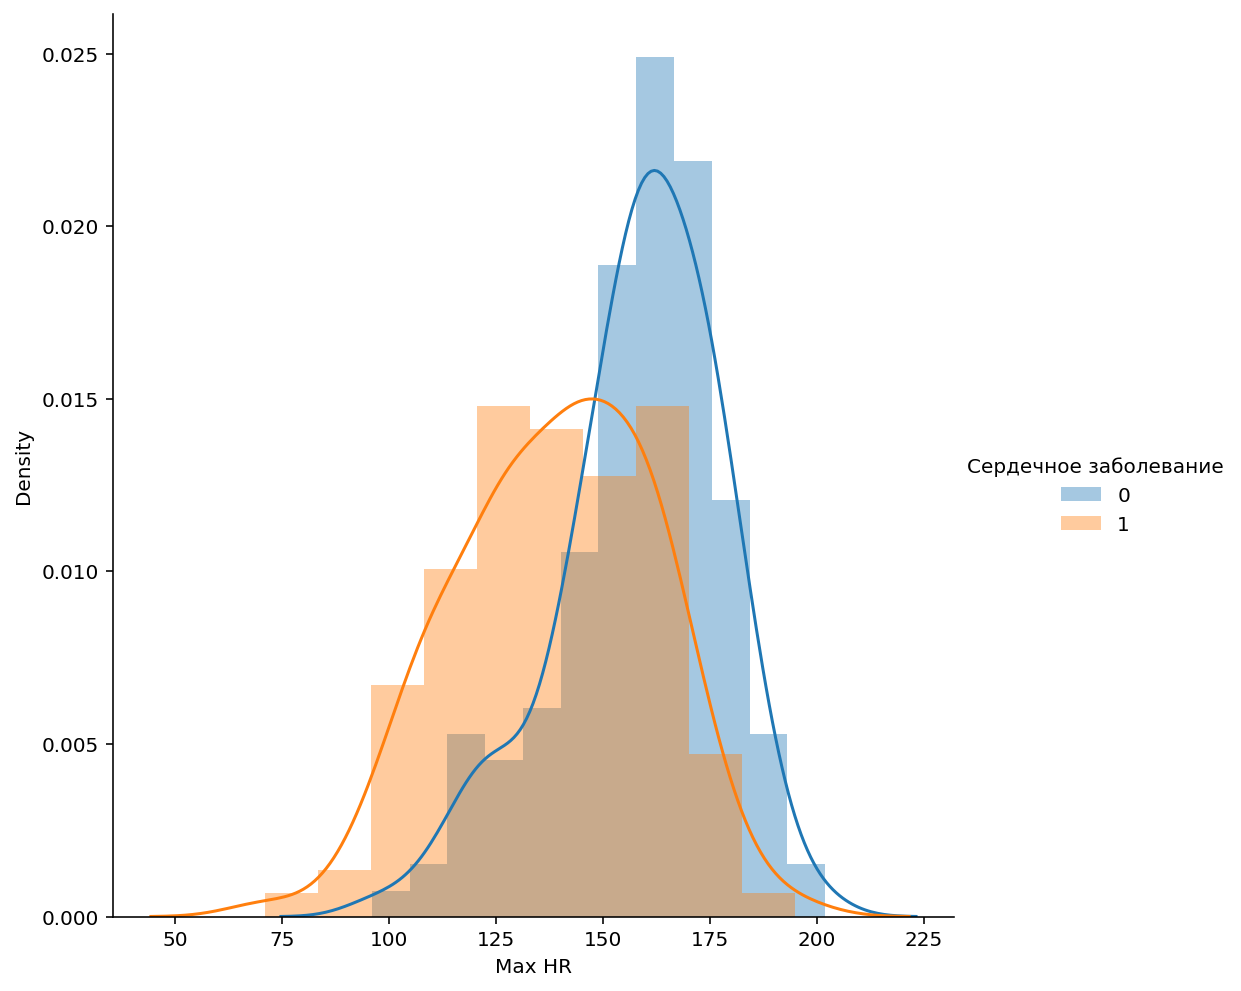

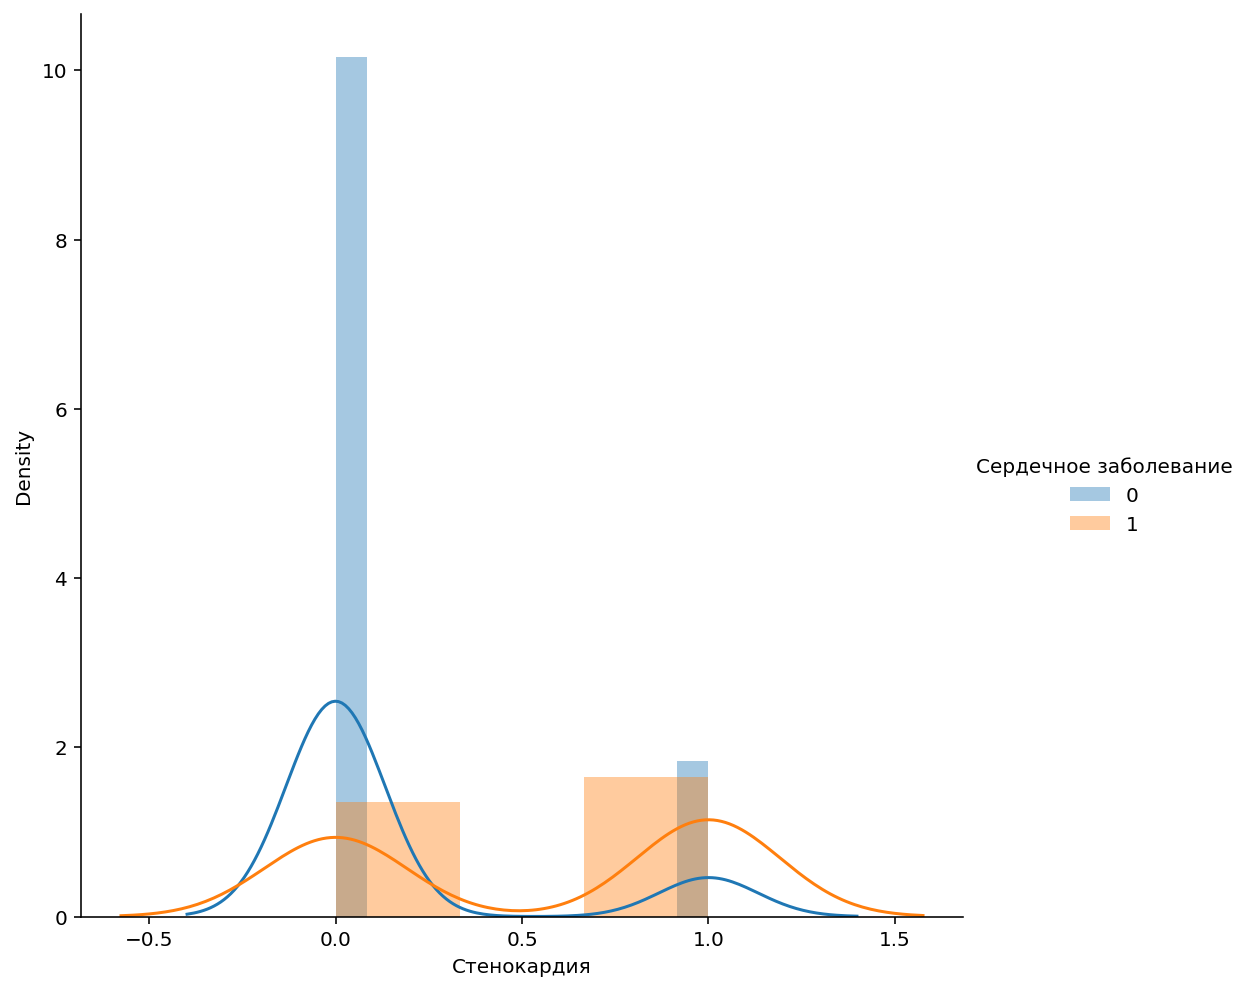

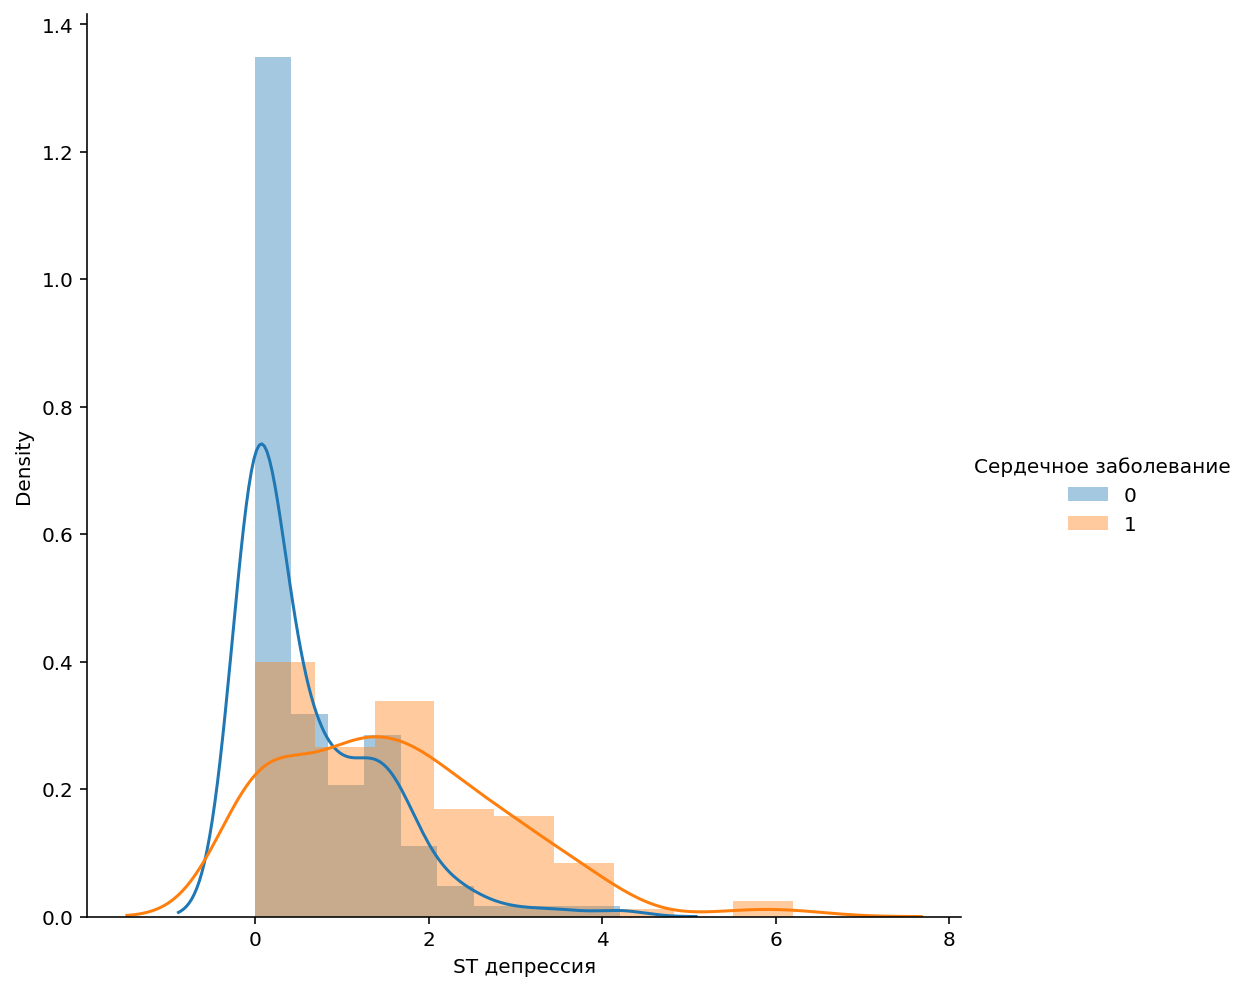

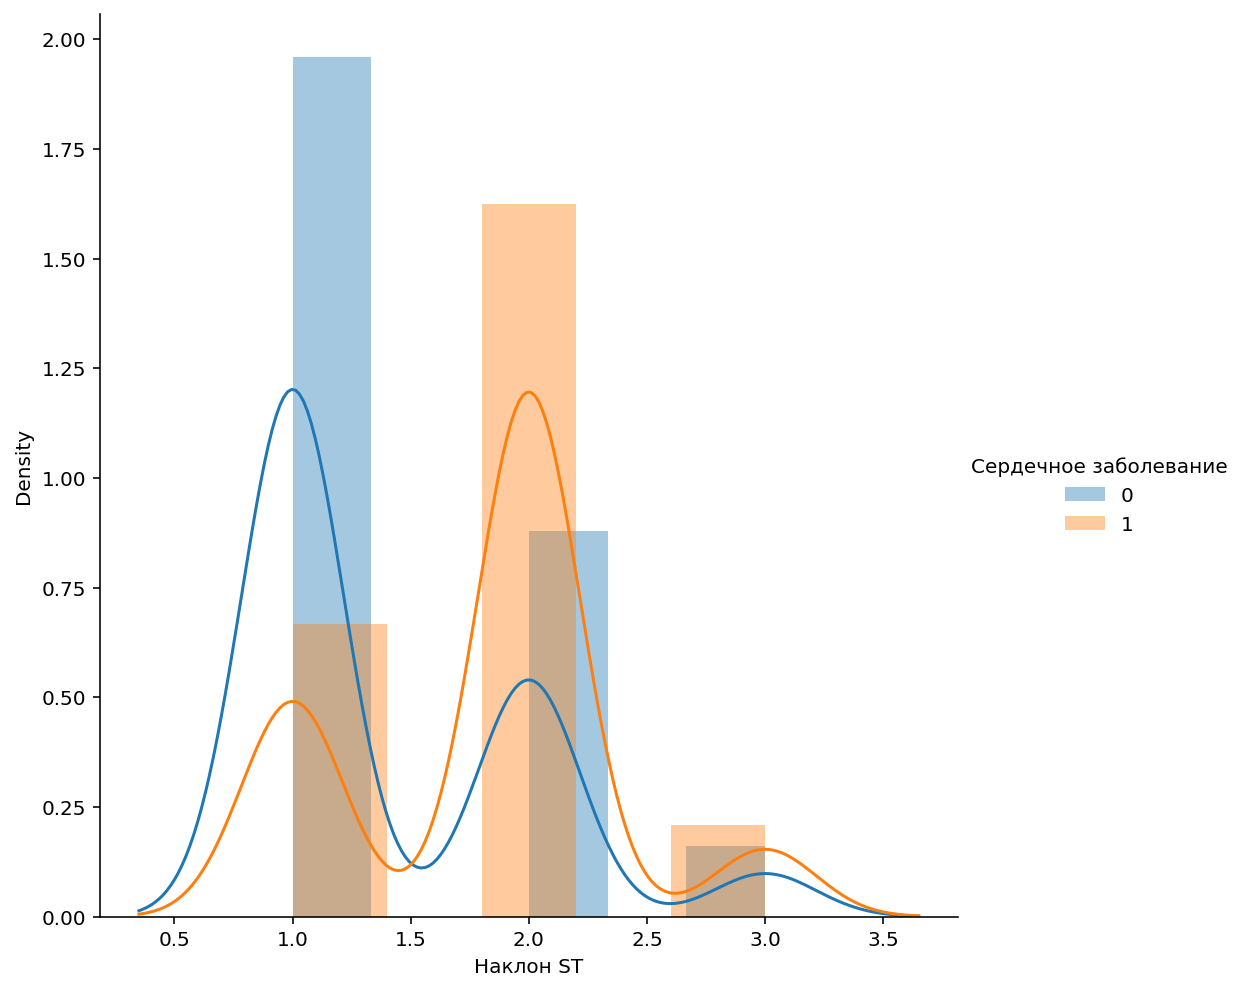

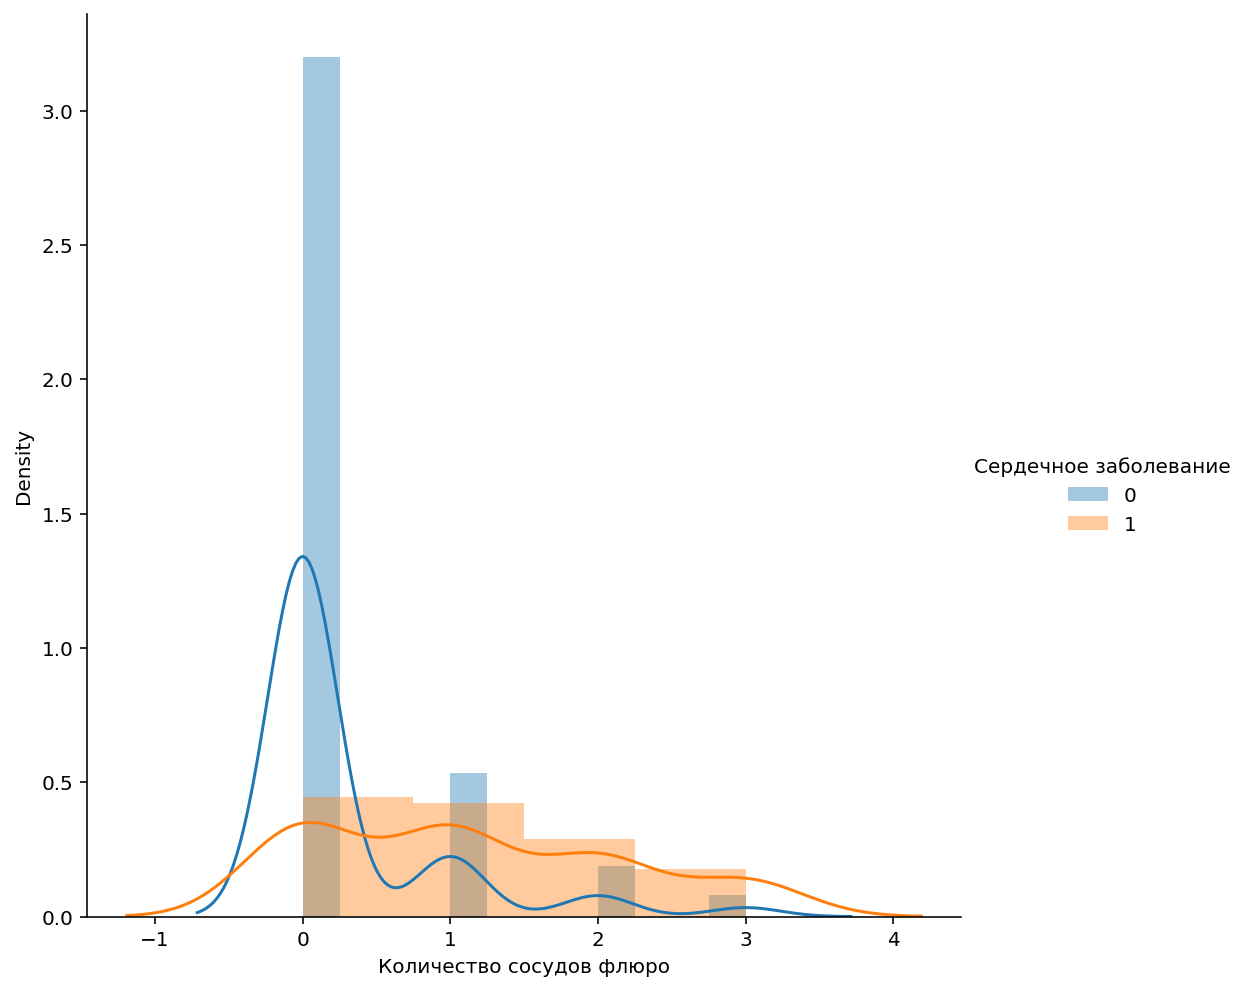

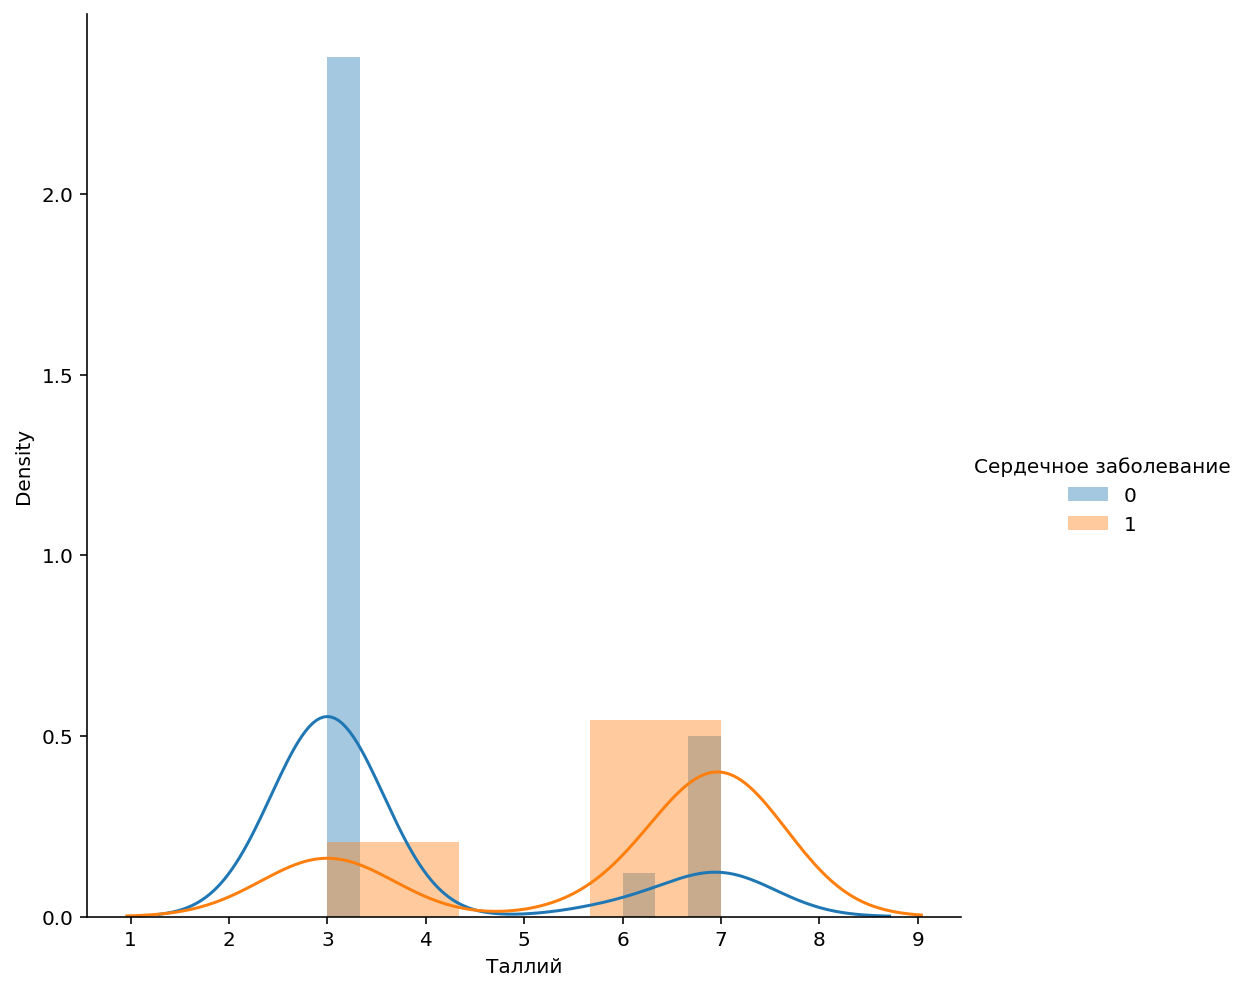

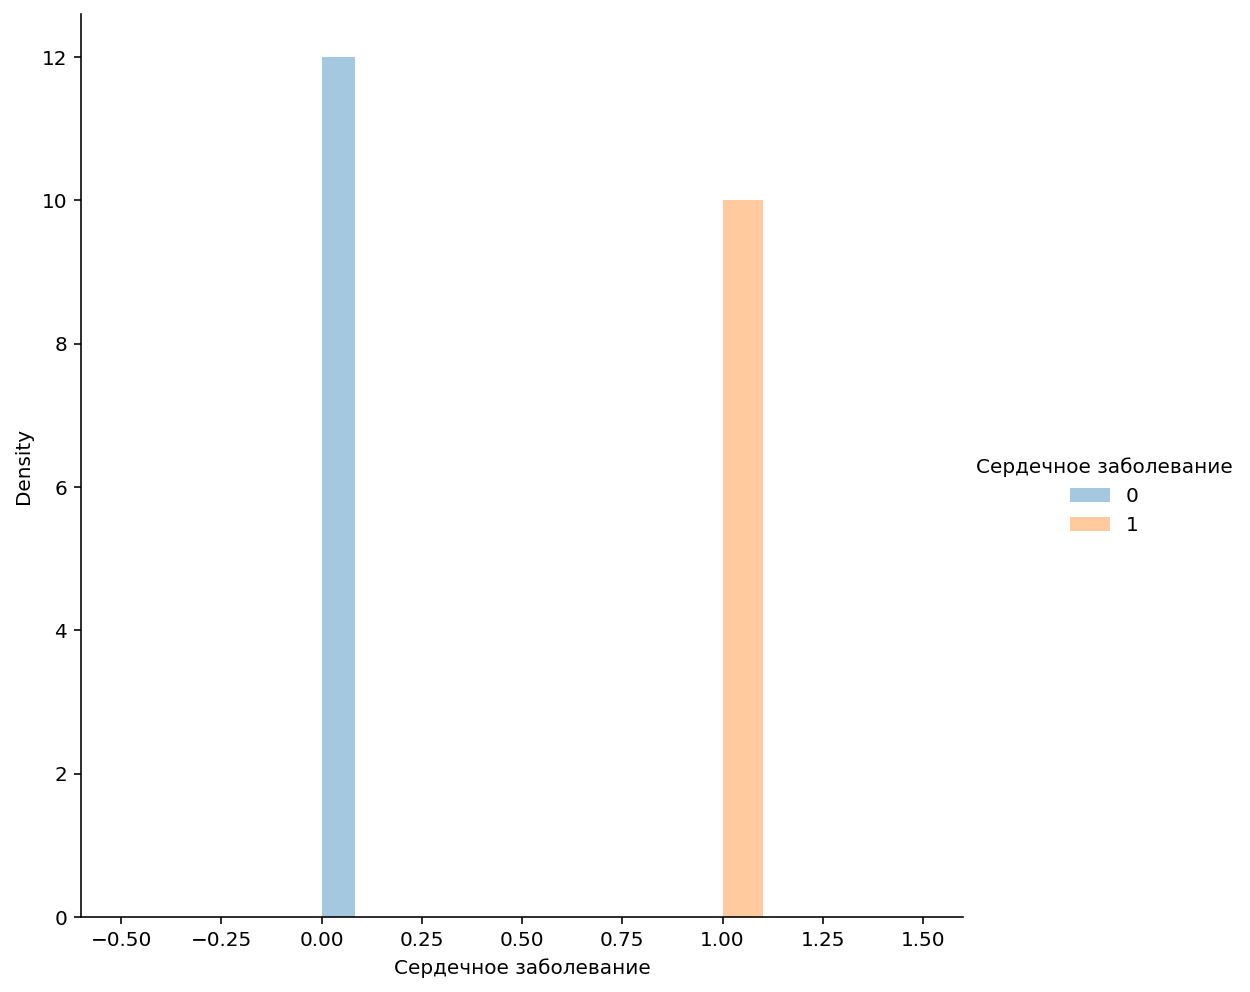

In [9]:
for i in X:
    sns.FacetGrid(X, hue='Сердечное заболевание', size=7).map(sns.distplot, i).add_legend()
    plt.show()

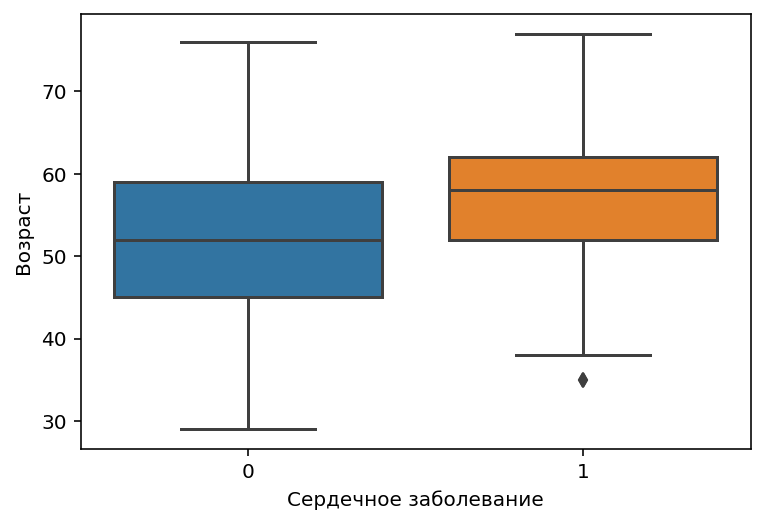

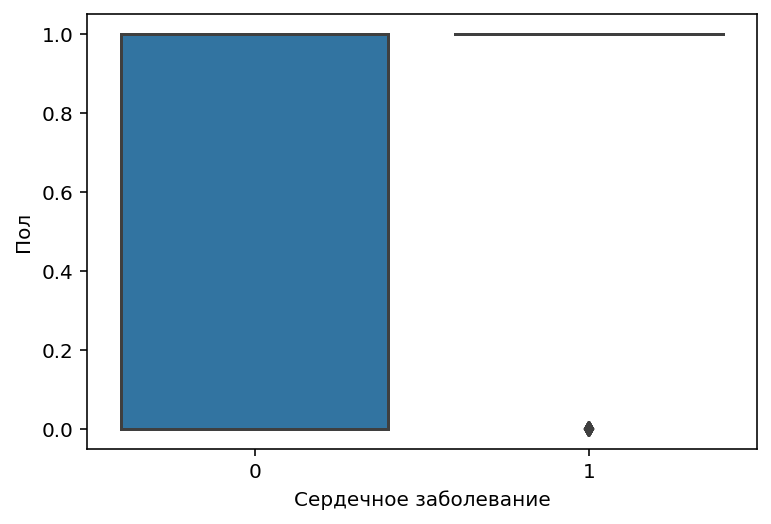

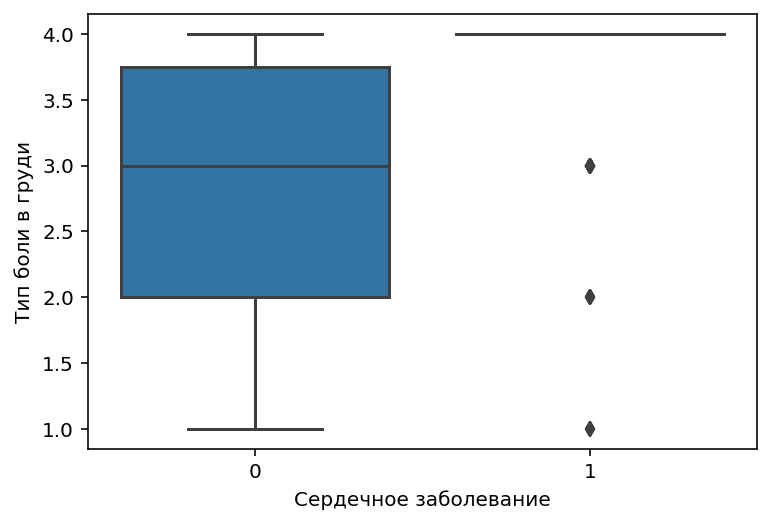

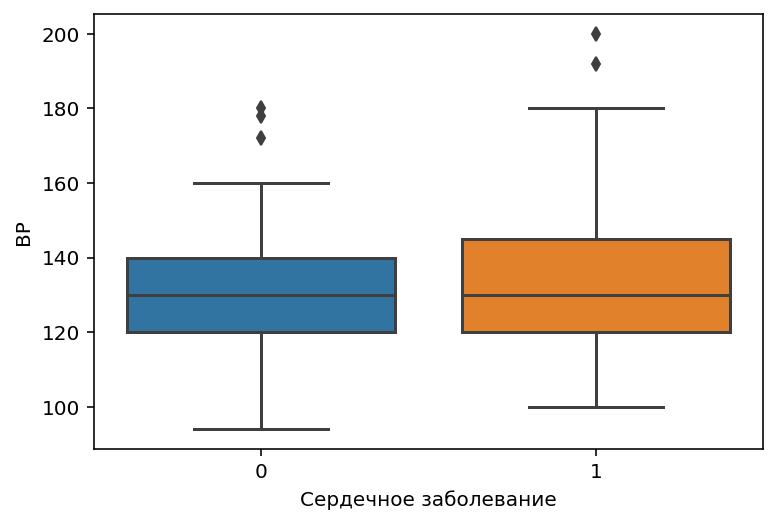

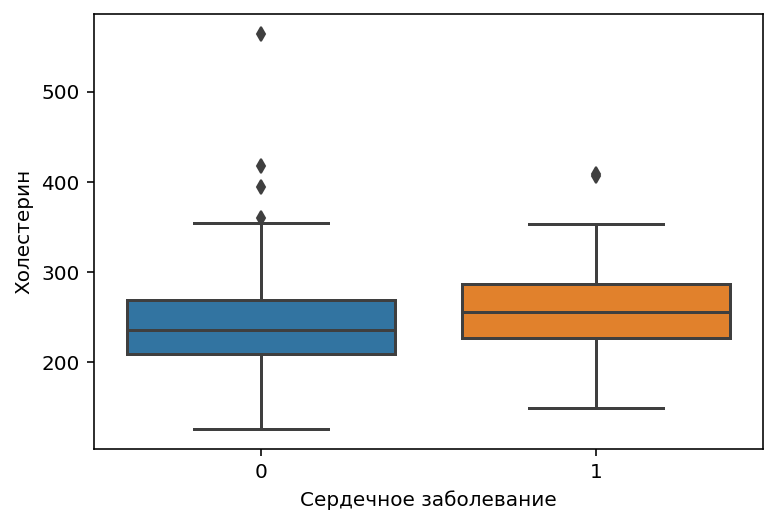

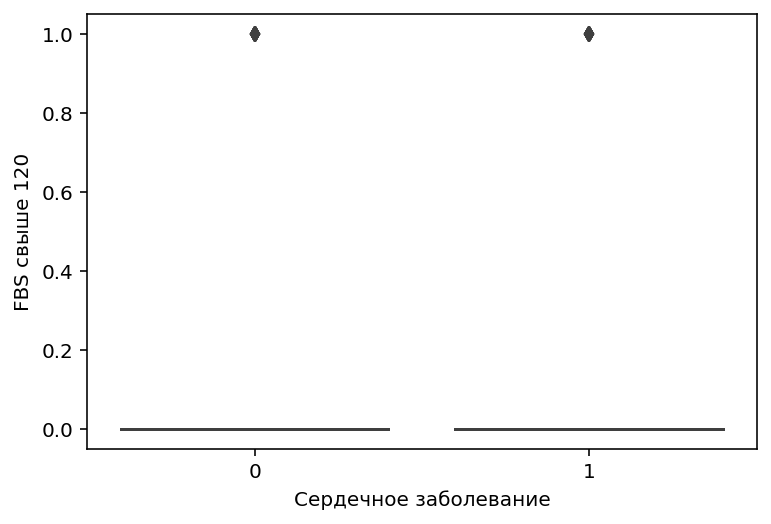

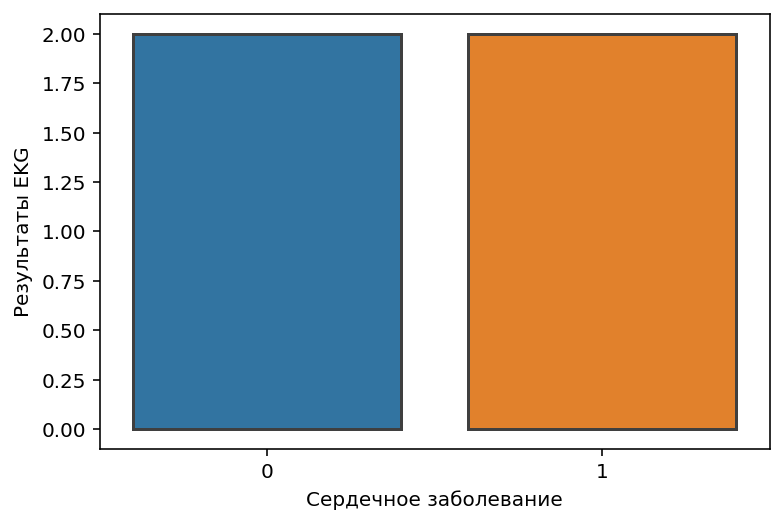

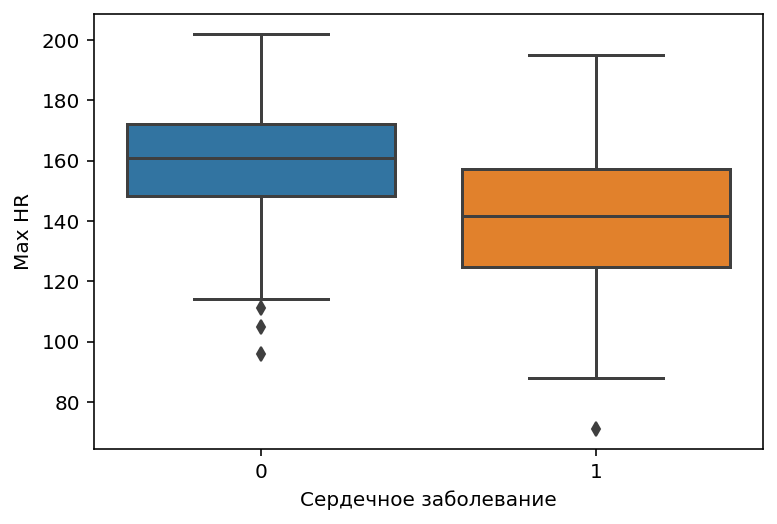

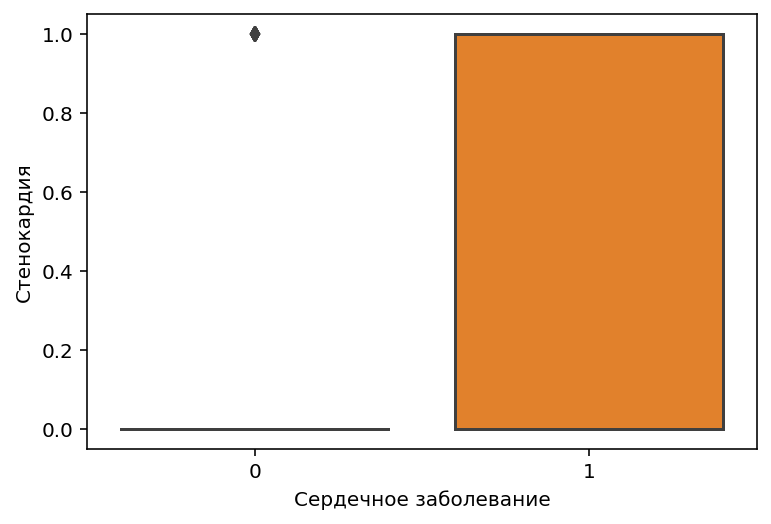

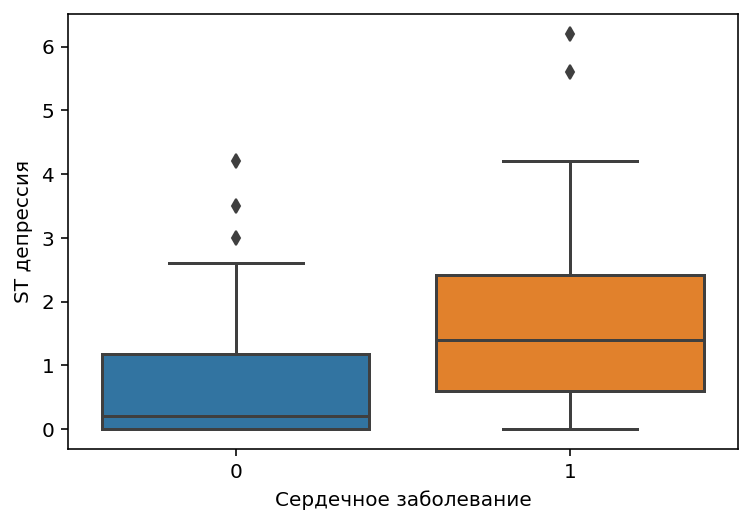

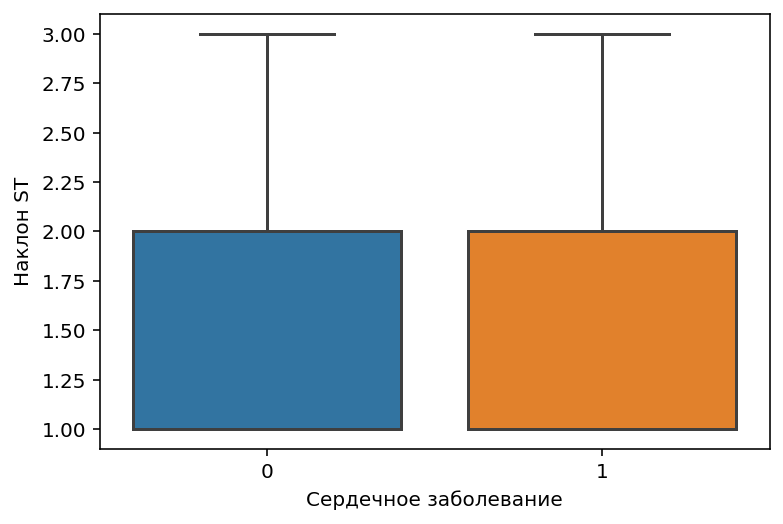

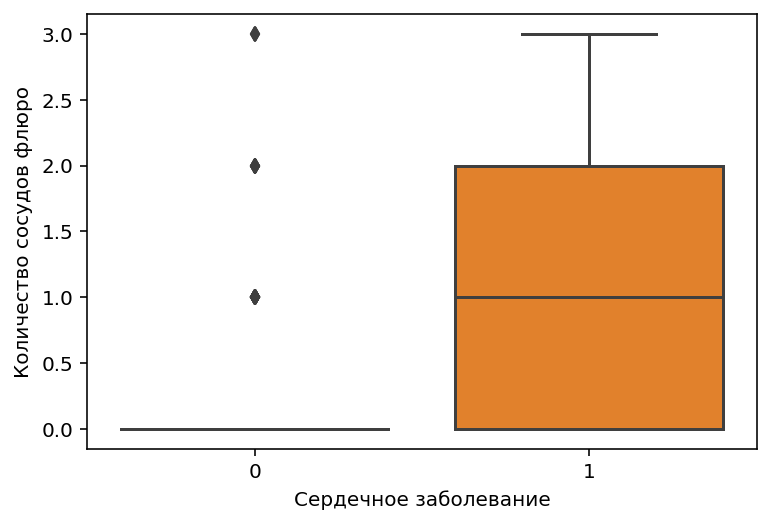

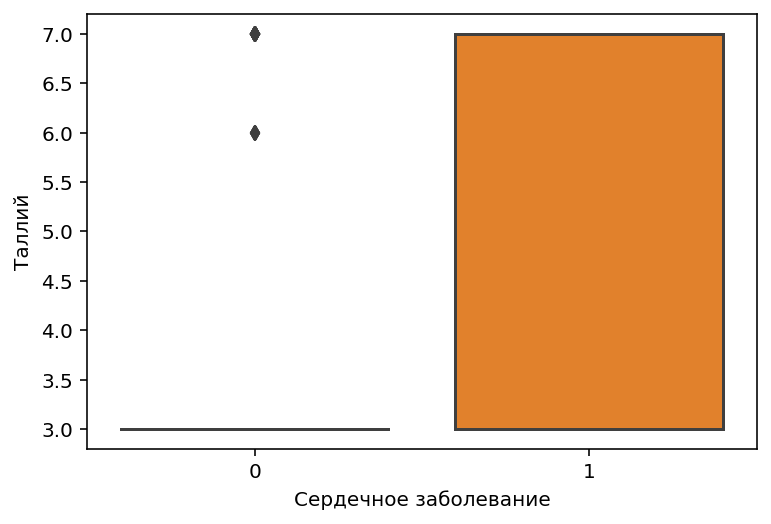

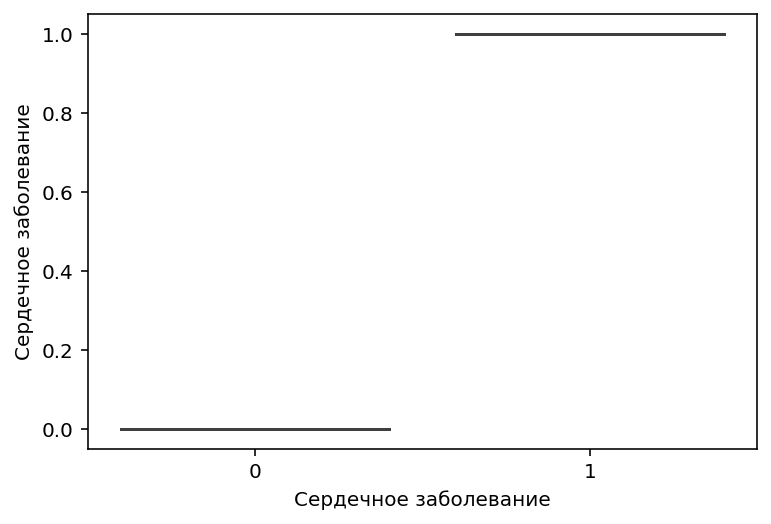

In [10]:
for i in X:
    sns.boxplot(x = 'Сердечное заболевание', y = i, data = X)
    plt.show()

In [11]:
for i in range(0,7):
    print(' признак : ', X.columns[i])
    print(X[X.columns[i]].unique())


 признак :  Возраст
[70 67 57 64 74 65 56 59 60 63 53 44 61 71 46 40 48 43 47 54 51 58 66 37
 50 42 62 49 52 45 41 76 39 35 55 34 38 69 68 77 29]
 признак :  Пол
[1 0]
 признак :  Тип боли в груди
[4 3 2 1]
 признак :  BP
[130 115 124 128 120 110 140 150 135 142 134 112 132 138 160 170 144 122
 152 101 126 118 136 105 174 145 108 156 106 104  94 146 148 178 125 100
 165 180 158 200 117 192 123 129 102 155 172]
 признак :  Холестерин
[322 564 261 263 269 177 256 239 293 407 234 226 235 303 149 311 203 211
 199 229 245 204 288 275 243 295 230 265 228 215 326 200 207 273 180 222
 223 209 233 197 218 246 225 315 205 417 195 198 166 178 249 281 126 305
 240 276 319 242 260 354 309 208 236 270 214 201 244 306 221 330 266 206
 212 302 313 141 237 289 254 274 258 160 327 304 271 283 188 286 360 267
 196 232 277 210 213 282 167 224 268 250 219 217 308 193 231 262 259 325
 299 182 294 298 409 172 184 394 174 255 248 300 318 216 252 227 220 168
 183 341 186 307 164 257 321 264 253 185 290 175 353

for i in range(7,14):
    print(' признак : ', X.columns[i])
    print(X[X.columns[i]].unique())

sns.barplot(X['Наклон ST'], X['Сердечное заболевание'])

sns.barplot(X['Тип боли в груди'], X['Сердечное заболевание'])

sns.barplot(X['Таллий'], X['Сердечное заболевание'])

sns.pairplot(df, hue='Сердечное заболевание', size = 5)
plt.show()

**Разбить на тестовую и обучающую выборку**

In [7]:
y = X['Сердечное заболевание']

In [8]:
X = X.drop(['FBS свыше 120', 'Сердечное заболевание'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Возраст                   270 non-null    int64  
 1   Пол                       270 non-null    int64  
 2   Тип боли в груди          270 non-null    int64  
 3   BP                        270 non-null    int64  
 4   Холестерин                270 non-null    int64  
 5   Результаты EKG            270 non-null    int64  
 6   Max HR                    270 non-null    int64  
 7   Стенокардия               270 non-null    int64  
 8   ST депрессия              270 non-null    float64
 9   Наклон ST                 270 non-null    int64  
 10  Количество сосудов флюро  270 non-null    int64  
 11  Таллий                    270 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 25.4 KB


In [9]:
# Ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 12), (54, 12), (216,), (54,))

**Кластерный анализ на основе K средних**

In [10]:
# Ваш код здесь
wcss = []
x = X.to_numpy()

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x) #Вычислить кластеризацию k-средних.
    wcss.append(kmeans.inertia_)
wcss

[973461.2949999997,
 549280.6143977591,
 431701.6264555507,
 351670.4842515876,
 294963.9883799194,
 260845.99792738043,
 237381.2793775364,
 217784.3172568568,
 203408.29893487628,
 184367.65322353962]

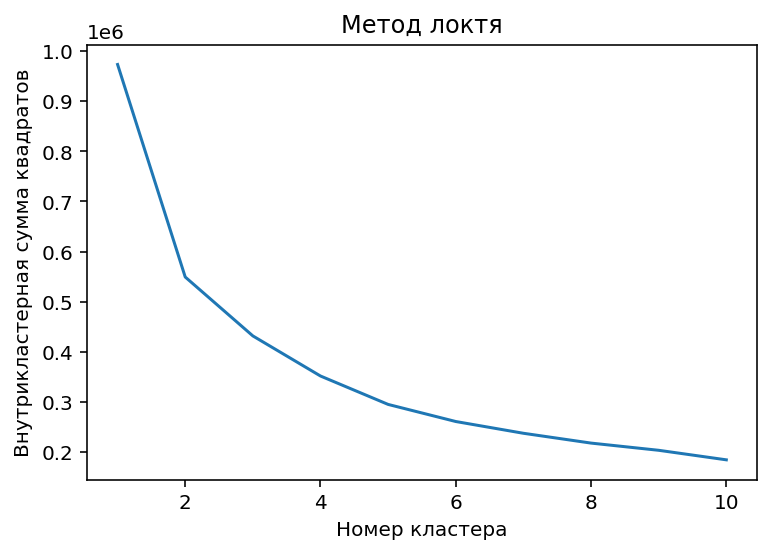

In [11]:
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Номер кластера')
plt.ylabel('Внутрикластерная сумма квадратов') 
plt.show()

In [20]:
# Ваш код здесь
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit(x)
labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
print(centroids1)
# print(len(labels1))
Z = y_kmeans.predict(x)
# print(type(Z))
# print(Z)
print(y_kmeans)
df['segkm'] = Z
df.head()

[[ 4.82708333e+01  6.25000000e-01  2.87500000e+00  1.29020833e+02
   1.97104167e+02  7.08333333e-01  1.68500000e+02  1.04166667e-01
   7.06250000e-01  1.39583333e+00  2.70833333e-01  4.20833333e+00]
 [ 5.38241758e+01  7.36263736e-01  3.10989011e+00  1.29901099e+02
   2.46472527e+02  9.67032967e-01  1.58989011e+02  2.63736264e-01
   9.23076923e-01  1.53846154e+00  6.26373626e-01  4.62637363e+00]
 [ 6.01935484e+01  7.41935484e-01  3.58064516e+00  1.31193548e+02
   2.73645161e+02  1.22580645e+00  1.12483871e+02  5.80645161e-01
   1.45161290e+00  1.90322581e+00  1.35483871e+00  5.00000000e+00]
 [ 6.26000000e+01 -1.11022302e-16  3.60000000e+00  1.35800000e+02
   4.38200000e+02  2.00000000e+00  1.55600000e+02  2.00000000e-01
   1.90000000e+00  1.80000000e+00  1.20000000e+00  5.40000000e+00]
 [ 5.63250000e+01  8.00000000e-01  3.42500000e+00  1.24700000e+02
   1.99200000e+02  1.02500000e+00  1.26250000e+02  5.00000000e-01
   1.49500000e+00  1.80000000e+00  7.25000000e-01  5.07500000e+00]
 [ 5.

,Возраст,Пол,Тип боли в груди,BP,Холестерин,FBS свыше 120,Результаты EKG,Max HR,Стенокардия,ST депрессия,Наклон ST,Количество сосудов флюро,Таллий,Сердечное заболевание,segkm
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,3
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,2
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,2


In [173]:

c=[]
for i in X:
    c.append(i)
c

['Возраст',
 'Пол',
 'Тип боли в груди',
 'BP',
 'Холестерин',
 'Результаты EKG',
 'Max HR',
 'Стенокардия',
 'ST депрессия',
 'Наклон ST',
 'Количество сосудов флюро',
 'Таллий']

**Диаграмма рассеивания - scatter plot**

Text(0, 0.5, 'Холестерин')

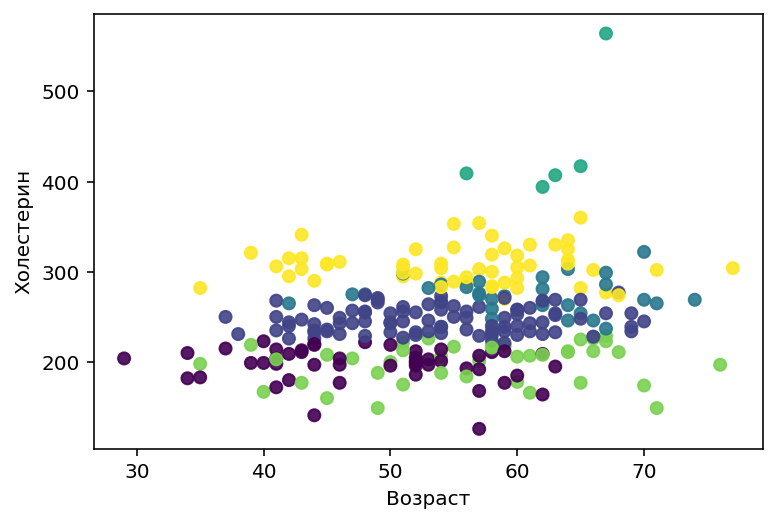

In [22]:
plt.scatter(x = df['Возраст'], y = df['Холестерин'], 
            c = df['segkm'], alpha = 0.9)
plt.xlabel('Возраст')
plt.ylabel('Холестерин')

**Модель машинного обучения с помощью алгоритма Дерево решений. Обучение модели**

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 12), (54, 12), (216,), (54,))

In [35]:
c=[]
for i in X:
    c.append(i)
c

['Возраст',
 'Пол',
 'Тип боли в груди',
 'BP',
 'Холестерин',
 'Результаты EKG',
 'Max HR',
 'Стенокардия',
 'ST депрессия',
 'Наклон ST',
 'Количество сосудов флюро',
 'Таллий']

In [30]:
predictors = c
decision_tree_model1 = DecisionTreeClassifier(random_state=14, criterion='entropy',
                                   max_depth=4)
decision_tree_model1.fit(X_train[predictors], y_train)
y_pred = decision_tree_model1.predict(X_test[predictors])

**Прогноз и оценка модели**

In [33]:
# Ваш код здесь
dol_tree_model1 = accuracy_score(y_pred, y_test) * 100
print('Доля верных прогнозов: ', dol_tree_model1)

Доля верных прогнозов:  72.22222222222221
